In [599]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [600]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [601]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})

In [602]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [603]:
df['EmploymentType']=df['EmploymentType'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [604]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [605]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training data{}".format(X_train.shape))
print("Test data{}".format(X_test.shape))

Training data(1390, 8)
Test data(597, 8)


In [606]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [607]:
df.TravelInsurance.value_counts(normalize=True)

0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64

In [608]:
from sklearn.ensemble import RandomForestClassifier

In [609]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.97
Recall (Test Set): 0.44
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79


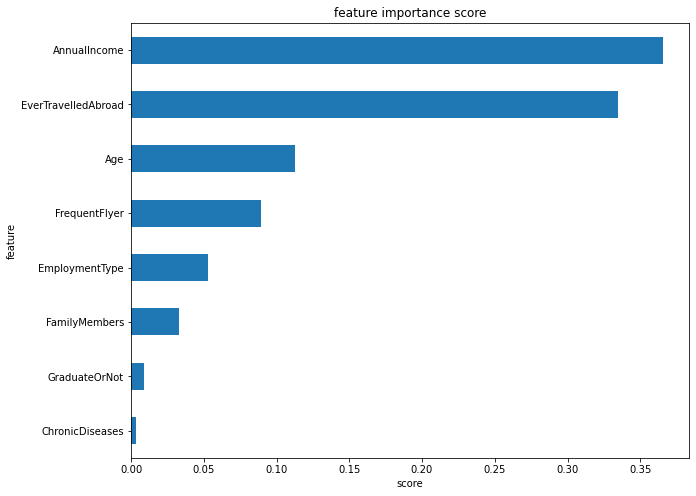

In [610]:
show_feature_importance(model)

In [611]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

In [612]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.97
Recall (Test Set): 0.44
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79


In [613]:
print("Train score:%.2f" %(model.score(X_train, y_train)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.79
Test score: 0.79
Accuracy (Test Set): 0.79
Precision (Test Set): 0.97
Recall (Test Set): 0.44
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79


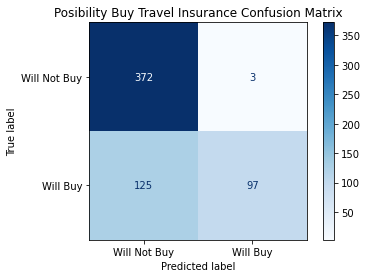

In [614]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [615]:
from imblearn import over_sampling,under_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [616]:
X_over_SMOTE = X_train
y_over_SMOTE = y_train

In [617]:
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(model)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.97
Recall (Test Set): 0.44
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79


In [618]:
print("Train score:%.2f" %(model.score(X_over, y_over)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.79
Test score: 0.79
Accuracy (Test Set): 0.79
Precision (Test Set): 0.97
Recall (Test Set): 0.44
F1-Score (Test Set): 0.60
AUC (test-proba): 0.79
AUC (train-proba): 0.79


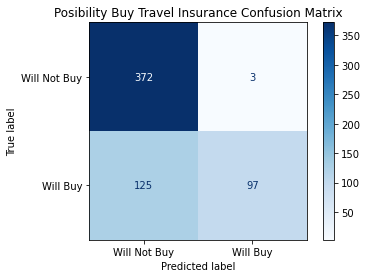

In [619]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [593]:
from sklearn.model_selection import RandomizedSearchCV

In [594]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [595]:
rfc = RandomForestClassifier(max_depth=2,random_state=42)
model = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [596]:
model.fit(X_over, y_over)
eval_classification(model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (Test Set): 0.82
Precision (Test Set): 0.93
Recall (Test Set): 0.57
F1-Score (Test Set): 0.71
AUC (test-proba): 0.80
AUC (train-proba): 0.93


In [538]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', model.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



In [539]:
model = RandomForestClassifier(n_estimators =100 , min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 10, bootstrap=False)
model.fit(X_over, y_over)
eval_classification(model)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.96
Recall (Test Set): 0.57
F1-Score (Test Set): 0.71
AUC (test-proba): 0.80
AUC (train-proba): 0.93


In [540]:
print("Train score:%.2f" %(model.score(X_over, y_over)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.84
Test score: 0.84
Accuracy (Test Set): 0.84
Precision (Test Set): 0.96
Recall (Test Set): 0.57
F1-Score (Test Set): 0.71
AUC (test-proba): 0.80
AUC (train-proba): 0.93


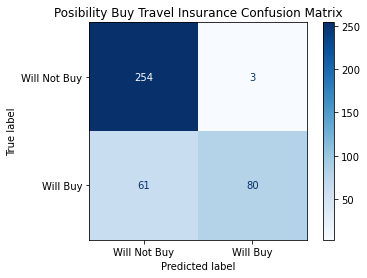

In [543]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [545]:
import shap

In [564]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [569]:
df.head(10)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
5,25,1,0,1150000,4,0,0,0,0
6,31,0,1,1300000,4,0,0,0,0
7,31,1,1,1350000,3,0,1,1,1
8,28,1,1,1450000,6,1,1,1,1
9,33,0,1,800000,3,0,1,0,0


In [570]:
shap.plots.waterfall(shap_values[3])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).